# 0.1 Circuit library
The Qiskit SDK includes a library of popular circuits which saves the time of  researching, writing code, and debugging.

### 0.1.1 Standard gates
Adding imported gates to the circuit using the append method; the first argument is the gate, and the next argument is a list of qubits to apply the gate.

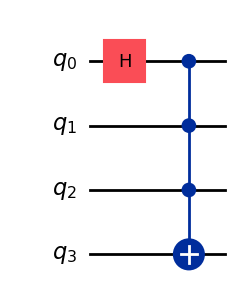

In [2]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import HGate, MCXGate

hadamard_gate= HGate()
mcx_gate= MCXGate(3)

qc= QuantumCircuit(4) #4 qubits
qc.append(hadamard_gate, [0]) #adding hadamard
qc.append(mcx_gate, [0,1, 2,3]) #adding mcx gates
qc.draw("mpl") # visualization

### 0.1.2 N-local circuits
- These circuits alternate layers of single-qubit rotation gates with layers of multi-qubit entangling gates.

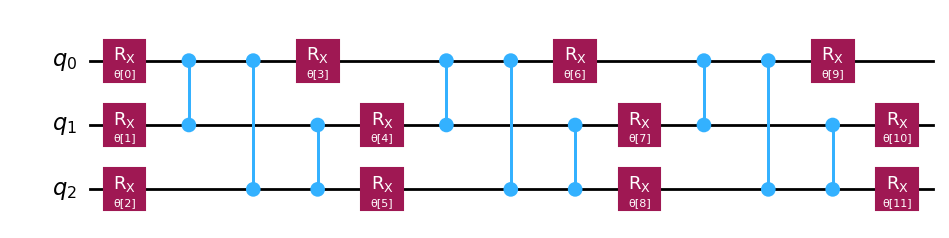

<Figure size 640x480 with 0 Axes>

In [87]:
import matplotlib.pyplot as plt
from qiskit.circuit.library import TwoLocal
 
two_local = TwoLocal(3, "rx", "cz")   #rx changes a single qubit's state, cz creates entanglement between two qubits
two_local.decompose().draw("mpl", plt.savefig('t3'))


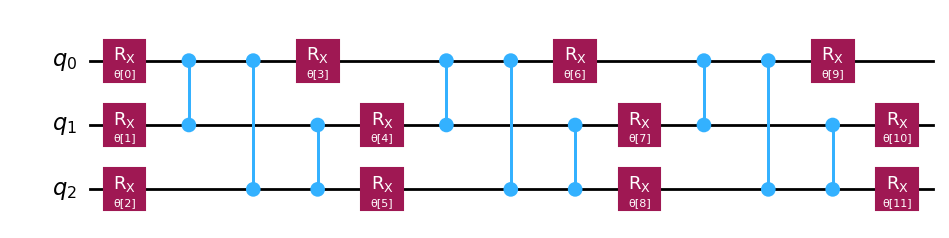

In [103]:
from qiskit.circuit.library import TwoLocal  #TwoLocal Class
#EfficientSU2, TwoLocal consists of alternating layers of single-qubit rotations and two-qubit entangling gates.
#TwoLocal offers more flexibility than EfficientSU2 in designing the circuit structure, allowing you to tailor it to specific problems
twolocal= TwoLocal(3, "rx", "cz")
twolocal.decompose().draw("mpl", filename='t4')

Let's break it down:

from qiskit.circuit.library import TwoLocal: This line imports the TwoLocal class from the qiskit.circuit.library module. The TwoLocal class is used to construct a parameterized quantum circuit consisting of alternating layers of single-qubit rotations and two-qubit entangling gates.  These circuits are often used in variational quantum algorithms (VQAs) and quantum machine learning.

- two_local = TwoLocal(3, "rx", "cz"): This line creates a TwoLocal circuit named two_local.

3: Specifies that the circuit operates on 3 qubits.
"rx": Specifies that the single-qubit rotation gates in the circuit should be rotations around the X-axis (rx). These rotations will be parameterized (meaning the rotation angles will be symbolic parameters that you can later bind to specific values).
"cz": Specifies that the two-qubit entangling gates should be controlled-Z gates (cz). The cz gate flips the target qubit (the second qubit) if the control qubit (the first qubit) is in the |1⟩ state.
- two_local.decompose().draw("mpl"): This line does two things:

two_local.decompose(): The decompose() method expands the TwoLocal circuit into its constituent gates. The TwoLocal circuit is a higher-level abstraction. decompose() replaces it with the actual sequence of rx and cz gates that make up the circuit. This is important for visualization and for running the circuit on a backend.
.draw("mpl"): This draws the decomposed circuit using Matplotlib ("mpl"). The drawing will visually represent the sequence of rx and cz gates applied to the qubits.
What the code does:

The code creates a quantum circuit with 3 qubits.  The circuit consists of alternating layers of:

- Single-qubit rotations: An rx gate is applied to each of the 3 qubits. These rx gates will have symbolic parameters, so their rotation angles are not yet fixed.
- Two-qubit entangling gates: A cz gate is applied between pairs of qubits. The default connectivity in TwoLocal is linear (0-1, 1-2). So, there will be a cz gate between qubit 0 and qubit 1, and another cz gate between qubit 1 and qubit 2.
This pattern of alternating single-qubit rotations and two-qubit entangling gat

In [15]:
#print circuit with random value
two_local.parameters

ParameterView([ParameterVectorElement(θ[0]), ParameterVectorElement(θ[1]), ParameterVectorElement(θ[2]), ParameterVectorElement(θ[3]), ParameterVectorElement(θ[4]), ParameterVectorElement(θ[5]), ParameterVectorElement(θ[6]), ParameterVectorElement(θ[7]), ParameterVectorElement(θ[8]), ParameterVectorElement(θ[9]), ParameterVectorElement(θ[10]), ParameterVectorElement(θ[11])])

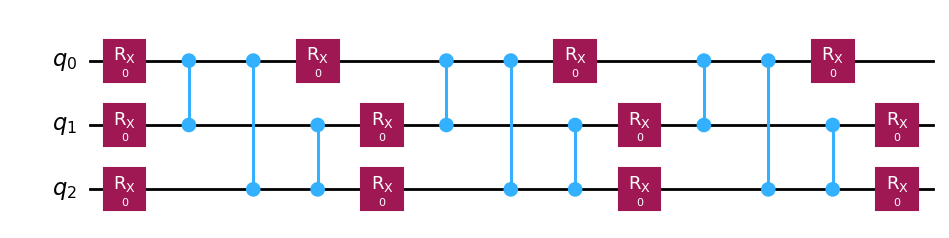

In [102]:
#Assigning parameters to real values(here 0) using a dictionary of the form { Parameter: number }
assign_parameter= two_local.assign_parameters(
    {p: 0 for p in two_local.parameters})    #adding o value to the circuit
assign_parameter.decompose().draw("mpl", filename='t5')

### 0.1.3 Data-encoding circuits


#These parameterized circuits encode data onto quantum states for processing by quantum machine learning algorithms\\types;
Amplitude encoding, which encodes each number into the amplitude of a basis state. This can store 
2
n
2 
n
  numbers in a single state, but can be costly to implement.
Basis encoding, which encodes an integer 
k
k by preparing the corresponding basis state 
∣
k
⟩
∣k⟩.
Angle encoding, which sets each number in the data as a rotation angle in a parameterized circuit.
The best approach depends upon the specifics of your application. On current quantum computers, however, we often use angle-encoding circuits such as the ZZFeatureMap.
https://docs.quantum.ibm.com/api/qiskit/circuit_library#data-encoding-circuits

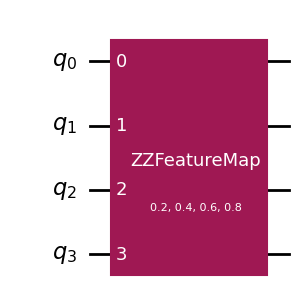

In [101]:
#Encoding data into the circuit
#These parameterized circuits encode data onto quantum states for processing by quantum machine learning algorithms
##how??????????
from qiskit.circuit.library import ZZFeatureMap
#---------------------------------
features= {.2, .4, .6, .8} #data
featuremap= ZZFeatureMap(feature_dimension=len(features)) #adding feature

encoded= featuremap.assign_parameters(features)
encoded.draw('mpl', filename='t6')

### 0.1.4 Time-evolution circuits
These circuits simulate a quantum state evolving in time,such as heat transfer or phase transitions in a system, chemistry wave functions etc....

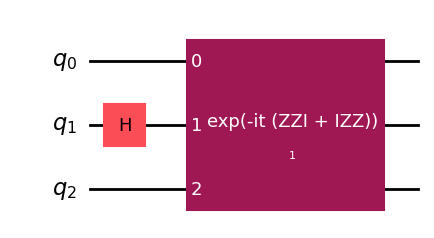

In [100]:
from qiskit.circuit.library import PauliEvolutionGate
from qiskit.circuit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
#initial state with a Hadamard on the middle gate
state=QuantumCircuit(3)
state.h(1)
hamiltonian= SparsePauliOp(["ZZI","IZZ"])
tevolution= PauliEvolutionGate(hamiltonian, time=1)
state.compose(evolution, inplace=True)
state.draw('mpl', filename='t7')

### 0.1.5 Benchmarking and complexity-theory circuits
Benchmarking circuits help us to sense of how well our hardware is actually working and complexity-theory circuits help us to understand how difficult the problems we want to solve are.
https://docs.quantum.ibm.com/api/qiskit/circuit_library#particular-quantum-circuits

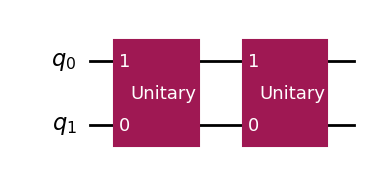

In [79]:
from qiskit.circuit.library import QuantumVolume
QuantumVolume(2).decompose().draw('mpl')

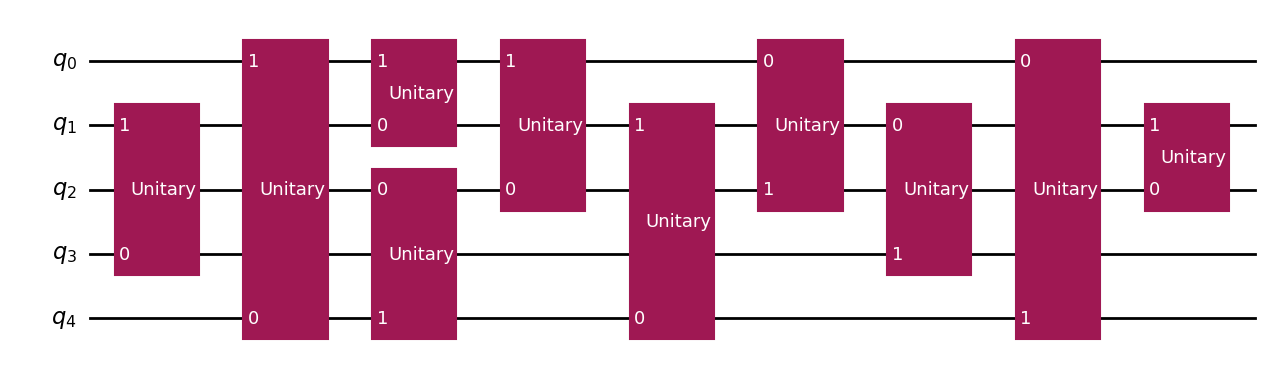

In [99]:
QuantumVolume(5).decompose().draw("mpl", filename='t8')

### 0.1.6 Arithmetic circuits____"ripple-carry"
Arithmetic operations are classical functions, such as adding integers and bit-wise operations whcih is usefull for amplitude estimation for finance applications and HHL algorithm, which solves linear systems of equations...........

In [83]:
from qiskit.circuit.library import CDKMRippleCarryAdder
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
adder= CDKMRippleCarryAdder(3)
#create

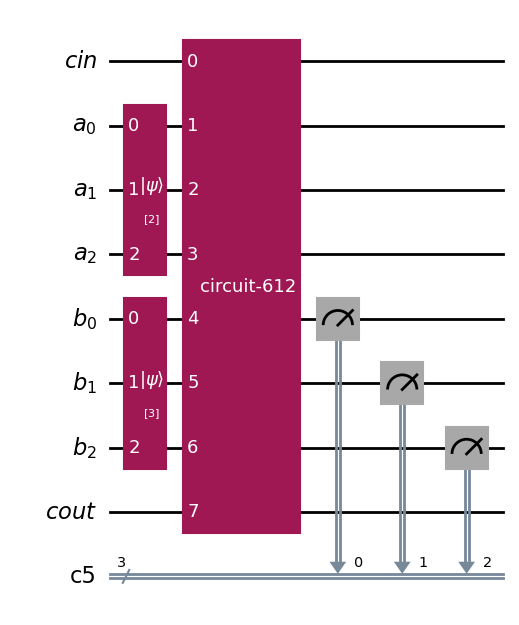

In [98]:
from qiskit.circuit.library import CDKMRippleCarryAdder
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
 
adder = CDKMRippleCarryAdder(3)  # Adder of 3-bit numbers
 
# Create the number A=2
reg_a = QuantumRegister(3, "a")
number_a = QuantumCircuit(reg_a)
number_a.initialize(2)  # Number 2; |010>
 
# Create the number B=3
reg_b = QuantumRegister(3, "b")
number_b = QuantumCircuit(reg_b)
number_b.initialize(3)  # Number 3; |011>
 
# Create a circuit to hold everything, including a classical register for
# the result
reg_result = ClassicalRegister(3)
circuit = QuantumCircuit(*adder.qregs, reg_result)
 
# Compose number initializers with the adder. Adder stores the result to
# register B, so we'll measure those qubits.
circuit = (
    circuit.compose(number_a, qubits=reg_a)
    .compose(number_b, qubits=reg_b)
    .compose(adder)
)
circuit.measure(reg_b, reg_result)
circuit.draw("mpl", filename= 't9')